<a href="https://colab.research.google.com/github/DavidCastro88/USWindEnergyProductionForecasts/blob/main/USWindEnergyProductionForecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd
from datetime import datetime

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/USWindEnergyProductionForecasts/main/wind-power-production-us.csv')
data.head()

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan 2001,6025,678,75,348,113,91,10,42,371,...,--,--,26,137,133,3,--,0,0,0
1,Feb 2001,5310,599,77,293,103,83,9,35,338,...,--,--,23,151,148,3,--,0,0,0
2,Mar 2001,5795,660,96,327,101,93,9,33,381,...,--,--,22,308,300,8,--,0,0,0
3,Apr 2001,5827,593,92,277,106,81,9,27,361,...,--,--,13,399,393,6,--,0,0,0
4,May 2001,5738,640,72,336,109,86,9,27,392,...,--,--,16,383,378,6,--,0,0,0


Variables:

"wind_state_name" : wind power production for the current state
"other_state_name" : production for all other renewables sources for the current state

In [4]:
nuevas_columnas = data.filter(regex='^date$|^wind.*$', axis=1)
data_wind = nuevas_columnas.copy()
data_wind

,date,wind,wind_united_states,wind_new_england,wind_connecticut,wind_maine,wind_massachusetts,wind_new_hampshire,wind_rhode_island,wind_vermont,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan 2001,NaN,389,1,--,--,--,--,--,1,...,--,--,26,137,133,3,--,0,0,0
1,Feb 2001,NaN,431,1,--,--,--,--,--,1,...,--,--,23,151,148,3,--,0,0,0
2,Mar 2001,NaN,532,1,--,--,--,--,--,1,...,--,--,22,308,300,8,--,0,0,0
3,Apr 2001,NaN,685,1,--,--,--,--,--,1,...,--,--,13,399,393,6,--,0,0,0
4,May 2001,NaN,635,1,--,--,--,--,--,1,...,--,--,16,383,378,6,--,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Oct 2022,NaN,32824,290,1,196,19,27,18,28,...,966,34,725,2456,1006,709,741,52,12,40
262,Nov 2022,NaN,41826,428,NM,287,25,53,22,39,...,1345,71,935,2904,1284,785,835,80,15,65
263,Dec 2022,NaN,39282,421,1,285,18,48,25,43,...,1548,71,1143,2660,1207,698,756,62,14,48
264,Jan 2023,NaN,39076,323,1,243,14,29,20,15,...,1681,78,922,2771,1381,687,703,43,12,31


In [5]:
data_wind.columns

Index(['date', 'wind', 'wind_united_states', 'wind_new_england',
       'wind_connecticut', 'wind_maine', 'wind_massachusetts',
       'wind_new_hampshire', 'wind_rhode_island', 'wind_vermont',
       'wind_middle_atlantic', 'wind_new_jersey', 'wind_new_york',
       'wind_pennsylvania', 'wind_east_north_central', 'wind_illinois',
       'wind_indiana', 'wind_michigan', 'wind_ohio', 'wind_wisconsin',
       'wind_west_north_central', 'wind_iowa', 'wind_kansas', 'wind_minnesota',
       'wind_missouri', 'wind_nebraska', 'wind_north_dakota',
       'wind_south_dakota', 'wind_south_atlantic', 'wind_delaware',
       'wind_district_of_columbia', 'wind_florida', 'wind_georgia',
       'wind_maryland', 'wind_north_carolina', 'wind_south_carolina',
       'wind_virginia', 'wind_west_virginia', 'wind_east_south_central',
       'wind_alabama', 'wind_kentucky', 'wind_mississippi', 'wind_tennessee',
       'wind_west_south_central', 'wind_arkansas', 'wind_louisiana',
       'wind_oklahoma', 'win

In [9]:
data_wind.dtypes

date                           object
wind                          float64
wind_united_states              int64
wind_new_england               object
wind_connecticut               object
                               ...   
wind_oregon                     int64
wind_washington                object
wind_pacific_noncontiguous      int64
wind_alaska                    object
wind_hawaii                     int64
Length: 64, dtype: object

In [10]:
data_wind['suma'] = data_wind.iloc[:, 3:].apply(pd.to_numeric, errors='coerce').sum(axis=1)
serie=data_wind[['date','suma']]

In [11]:
serie=serie.rename(columns={'suma':'wind_power'})

In [12]:
serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        266 non-null    object 
 1   wind_power  266 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [13]:
serie['date'] = pd.to_datetime(serie['date'])

<ipython-input-13-86c9f13b4e81>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  serie['date'] = pd.to_datetime(serie['date'])


In [14]:
serie = serie.set_index("date")
serie.head()

,wind_power
date,
2001-01-01,777.0
2001-02-01,862.0
2001-03-01,1064.0
2001-04-01,1369.0
2001-05-01,1270.0


In [15]:
serie.index.freq = 'MS'

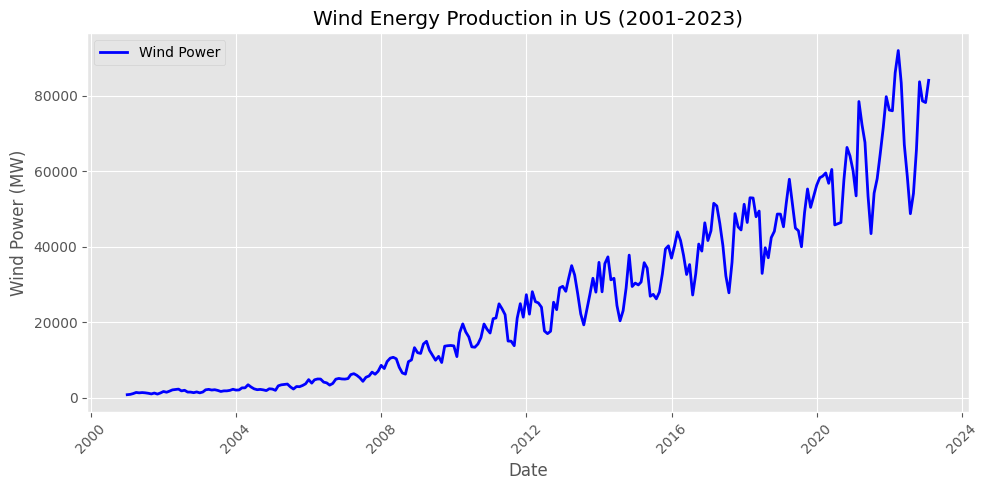

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(serie.index, serie['wind_power'], linestyle='-', color='blue', linewidth=2, label='Wind Power')
plt.xlabel('Date')
plt.ylabel('Wind Power (MW)')
plt.title('Wind Energy Production in US (2001-2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

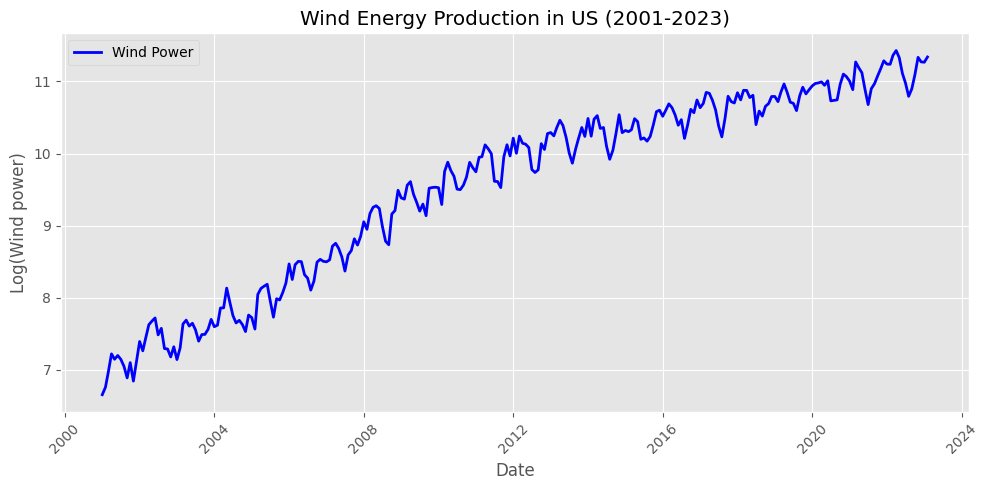

In [20]:
serie['wind_power_log'] = np.log(serie['wind_power'])
plt.figure(figsize=(10, 5))
plt.plot(serie.index, serie['wind_power_log'], linestyle='-',color='blue', linewidth=2, label='Wind Power')
plt.xlabel('Date')
plt.ylabel('Log(Wind power)')
plt.title('Wind Energy Production in US (2001-2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

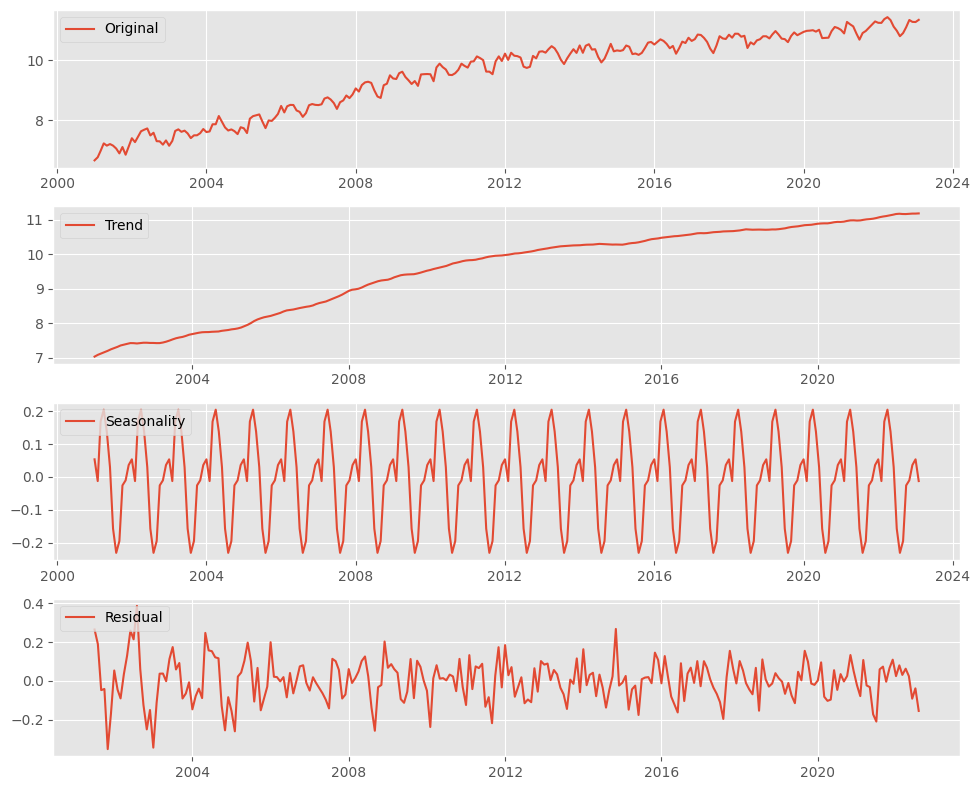

In [21]:
import statsmodels.api as sm

serie.index = pd.to_datetime(serie.index)
decomposition = sm.tsa.seasonal_decompose(serie['wind_power_log'], model='additive')
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(serie.index, serie['wind_power_log'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(serie.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(serie.index, decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(serie.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## **Arima Models**

To apply Arima models we must ensure that the series is a stationary process in covariance. For that we apply the DuckeFuller test. If not, we apply the first regular and seasonal difference filter, as appropriate.

In [27]:
def Test_Dickey_Fuller(series, column_name):
     print (f'Dickey-Fuller test results for column: {column_name}')
     dftest = adfuller(series, autolag='AIC')
     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
     for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
     print (dfoutput)
     if dftest[1] <= 0.05:
         print("<====Conclusion:====>")
         print("Reject the null hypothesis")
         print("The data is stationary")
     else:
         print("<====Conclusion:====>")
         print("Cannot reject null hypothesis")
         print("The data is not stationary")

In [28]:
Test_Dickey_Fuller(serie['wind_power_log'],'wind_power_log')

Dickey-Fuller test results for column: wind_power_log
Test Statistic                  -2.215100
p-value                          0.200811
No Lags Used                    15.000000
Number of observations used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64
<====Conclusion:====>
Cannot reject null hypothesis
The data is not stationary


In [29]:
serie1=serie.copy()
serie1['yt_diff'] = serie['wind_power_log'].diff()
serie1.dropna(inplace=True)
serie1.head()

,wind_power,wind_power_log,yt_diff
date,,,
2001-02-01,862.0,6.759255,0.103815
2001-03-01,1064.0,6.969791,0.210535
2001-04-01,1369.0,7.221836,0.252045
2001-05-01,1270.0,7.146772,-0.075064
2001-06-01,1338.0,7.198931,0.052159


#### ***First Regular Diference***

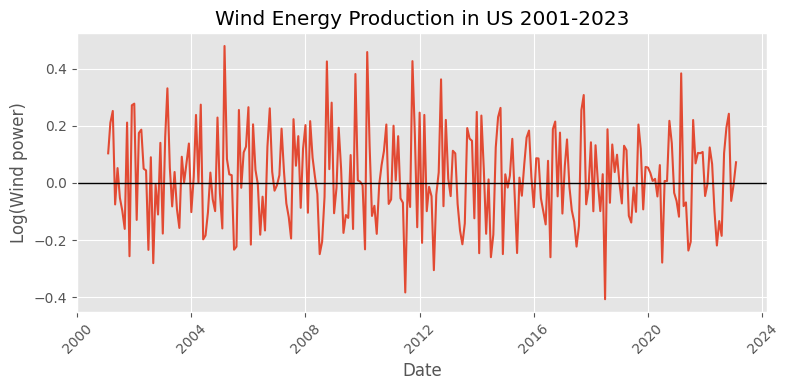

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(serie1.index, serie1['yt_diff'], linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Log(Wind power)')
plt.title('Wind Energy Production in US 2001-2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### ***First Season Diference***

In [31]:
D = 1  # Orden de la diferencia estacional
s = 12  # Periodo estacional
serie1['yt_diff_diff'] = serie1['yt_diff'].diff(periods=s*D)
serie1.dropna(inplace=True)
serie1.head()

,wind_power,wind_power_log,yt_diff,yt_diff_diff
date,,,,
2002-02-01,1428.0,7.264030,-0.129233,-0.233048
2002-03-01,1701.0,7.438972,0.174941,-0.035594
2002-04-01,2050.0,7.625595,0.186623,-0.065422
2002-05-01,2155.0,7.675546,0.049951,0.125015
2002-06-01,2252.0,7.719574,0.044028,-0.008131


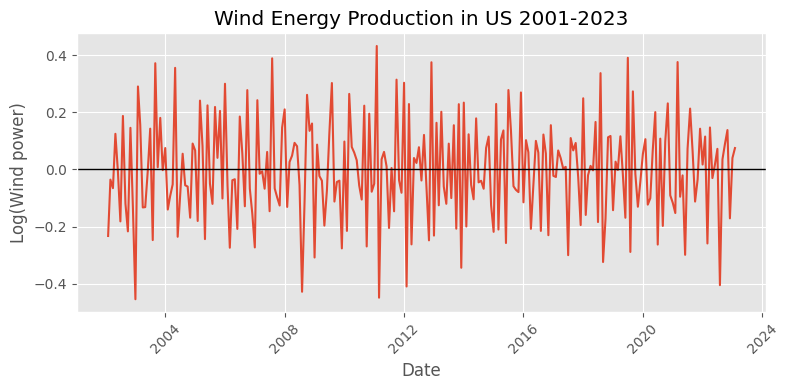

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(serie1.index, serie1['yt_diff_diff'], linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Log(Wind power)')
plt.title('Wind Energy Production in US 2001-2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
Test_Dickey_Fuller(serie1['yt_diff_diff'],'yt_diff_diff')

Dickey-Fuller test results for column: yt_diff_diff
Test Statistic                -7.458644e+00
p-value                        5.427383e-11
No Lags Used                   1.600000e+01
Number of observations used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64
<====Conclusion:====>
Reject the null hypothesis
The data is stationary


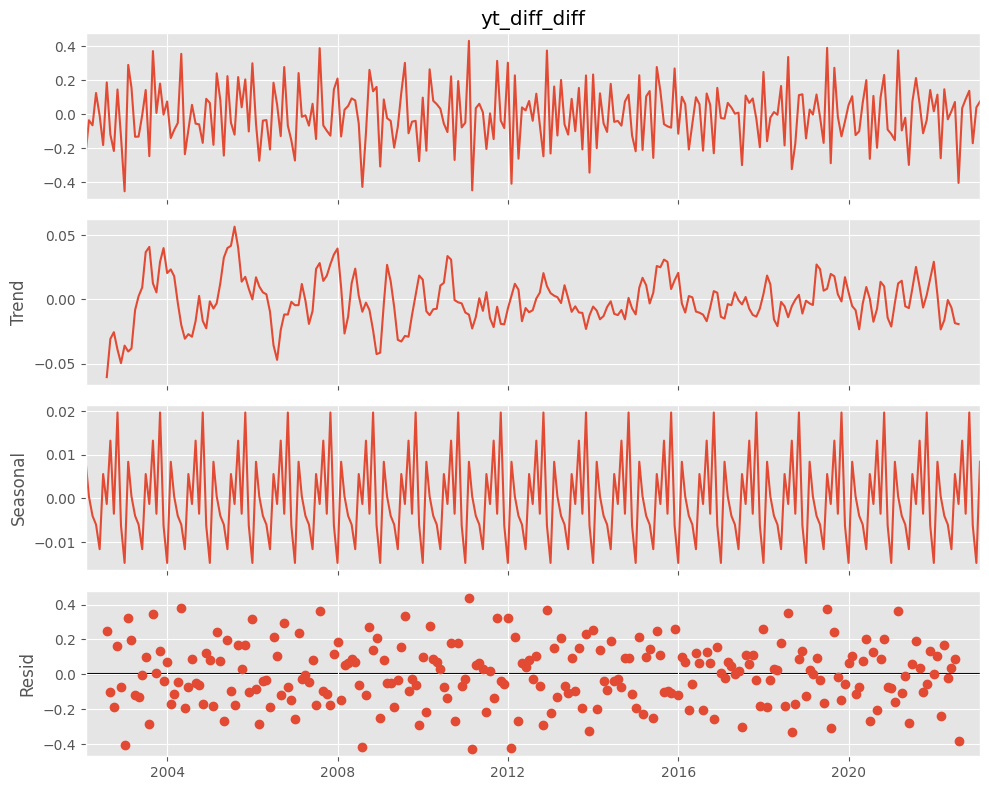

In [34]:
plt.rcParams["figure.figsize"] = (10, 8)
a = seasonal_decompose(serie1['yt_diff_diff'], model = "add")
a.plot();

In [35]:
train_data = serie[:len(serie)-12]
test_data = serie[len(serie)-12:]
test=test_data.copy()

In [36]:
train_data.shape, test_data.shape

((254, 2), (12, 2))

In [37]:
test_data

,wind_power,wind_power_log
date,,
2022-03-01,86021.0,11.362347
2022-04-01,91914.0,11.428609
2022-05-01,83333.0,11.330600
2022-06-01,66959.0,11.111836
2022-07-01,58600.0,10.978490
2022-08-01,48706.0,10.793558
2022-09-01,54063.0,10.897905
2022-10-01,65644.0,11.092001
2022-11-01,83643.0,11.334313


In [38]:
#!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00


In [39]:
from pmdarima import auto_arima
modelo_auto=auto_arima(train_data['wind_power_log'],start_p=0,start_q=0,d=1,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-155.663, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-274.136, Time=0.86 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-325.646, Time=2.42 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-225.591, Time=0.51 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-326.656, Time=3.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-302.280, Time=1.96 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-324.743, Time=8.40 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-324.780, Time=17.59 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-326.774, Time=3.97 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-270.860, Time=1.82 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-327.078, Time=3.36 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-326.614, Time=1.12 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-325.986, Time=8.13 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-327.232, Time=1.43 sec
 ARIMA(1,1,1)(1,1,

In [40]:
print(modelo_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  254
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 170.139
Date:                            Wed, 03 Apr 2024   AIC                           -328.277
Time:                                    20:34:38   BIC                           -307.369
Sample:                                01-01-2001   HQIC                          -319.854
                                     - 02-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2636      0.100      2.637      0.008       0.068       0.459
ar.L2          0.1366      0.085   

In [41]:
arima_model = SARIMAX(train_data['wind_power_log'], order = (2,1,1), seasonal_order = (1,1,1,12))
model1 = arima_model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     wind_power_log   No. Observations:                  254
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 170.139
Date:                            Wed, 03 Apr 2024   AIC                           -328.277
Time:                                    20:35:14   BIC                           -307.369
Sample:                                01-01-2001   HQIC                          -319.854
                                     - 02-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2636      0.100      2.637      0.008       0.068       0.459
ar.L2          0.1366      0.085      1.612      0.107      -0.029       0.303
ma.L1         -0.8385      0.076    -10.969      0.000      -0.988      -0.689
ar.S.L12      -0.1591      0.089     -1.786      0.074      -0.334       0.016
ma.S.L12      -0.6287      0.077     -8.144      0.000      -0.780      -0.477
sigma2         0.0137      0.001      9.991      0.000       0.011       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.95   Prob(JB):                         0.23
Heteroskedasticity (H):               0.57   Skew:                             0.27
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-42-f6e8b98c5d07>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


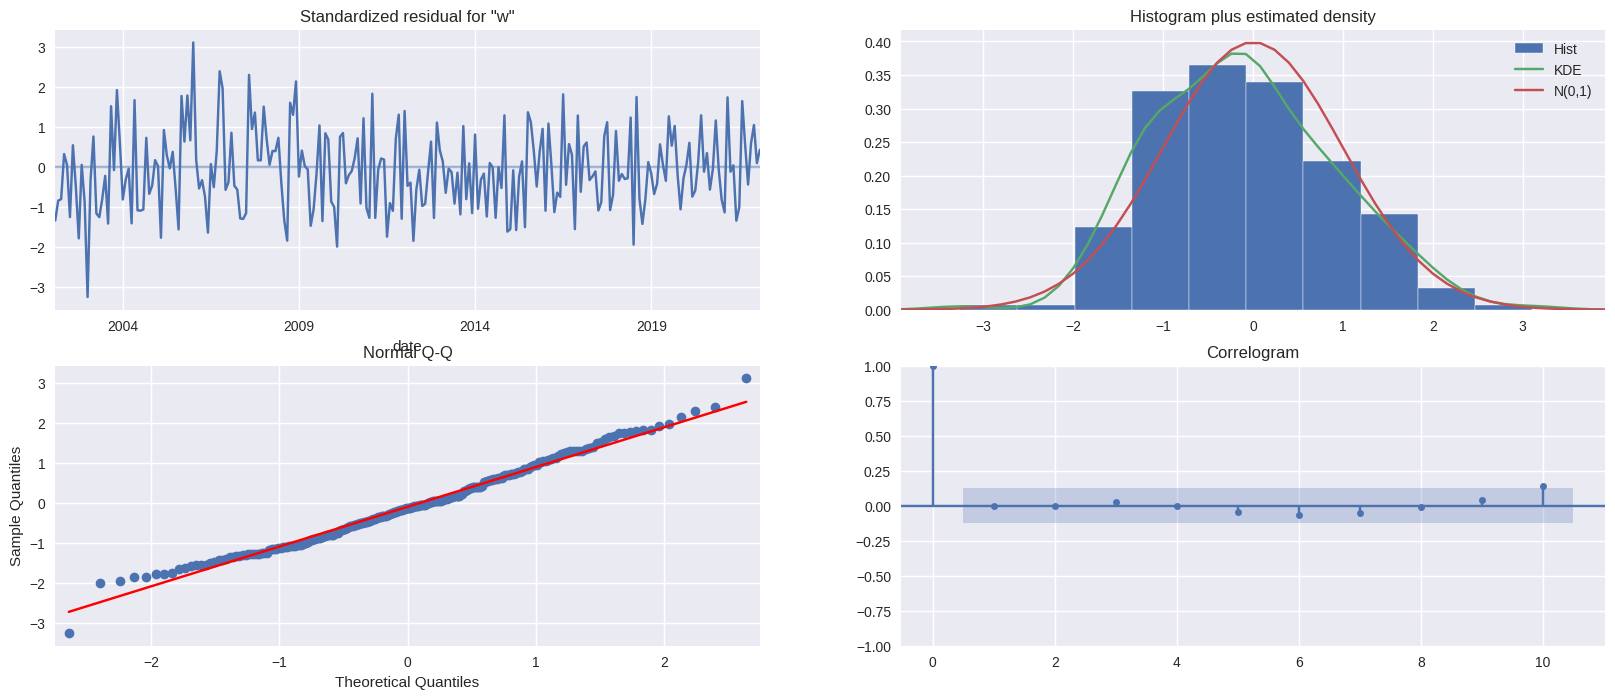

In [42]:
plt.style.use('seaborn')
model1.plot_diagnostics(figsize=(20,8))
plt.show()

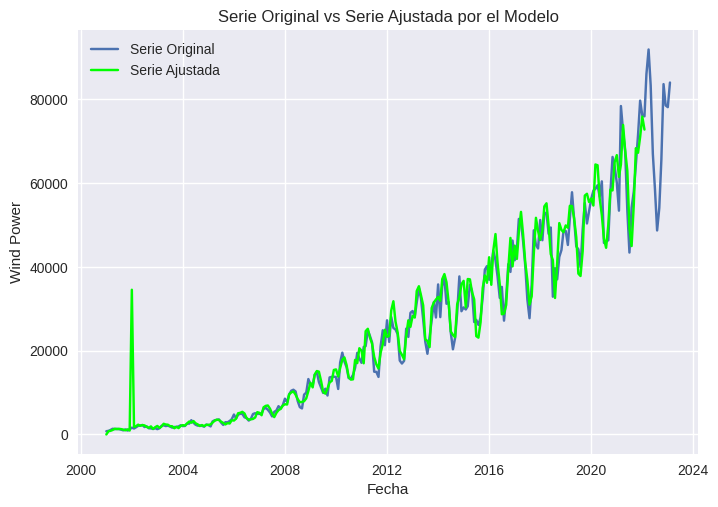

In [43]:
sigma2 = model1.params['sigma2']
factor_correccion = np.exp(sigma2 / 2)
serie_ajustada = np.exp(model1.fittedvalues) * factor_correccion

plt.plot(serie['wind_power'].index, serie['wind_power'], label='Serie Original')
plt.plot(serie_ajustada.index, serie_ajustada.values, label='Serie Ajustada', linestyle='-',color='lime')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Original vs Serie Ajustada por el Modelo')
plt.legend()
plt.show()

In [44]:
arima_pred = np.exp(model1.predict(start = len(train_data), end = len(serie)-1, typ="levels").rename("ARIMA Predictions"))*factor_correccion
arima_pred

2022-03-01    85190.430549
2022-04-01    85708.900498
2022-05-01    78699.857053
2022-06-01    72442.135196
2022-07-01    59247.562195
2022-08-01    60558.054733
2022-09-01    65542.360438
2022-10-01    77860.400169
2022-11-01    82266.089984
2022-12-01    85394.614085
2023-01-01    84489.997636
2023-02-01    80909.877262
Freq: MS, Name: ARIMA Predictions, dtype: float64

<ipython-input-45-ff6791c93252>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


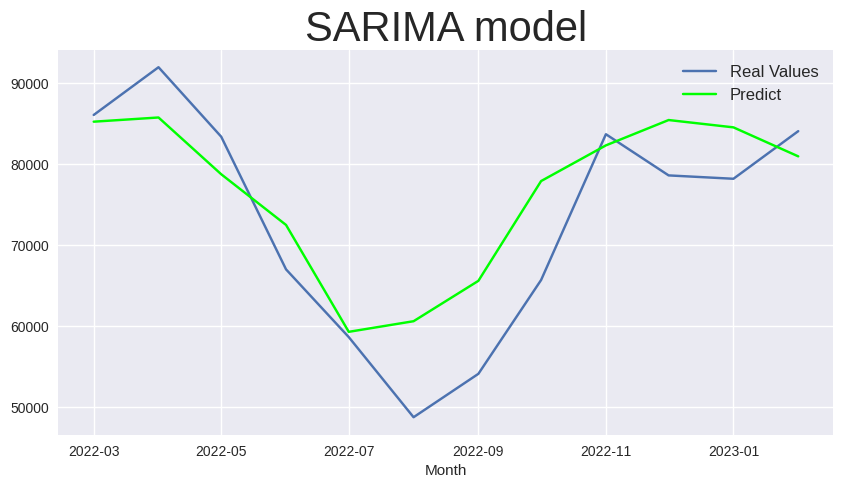

In [45]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(test_data["wind_power"], label="Real Values")
plt.plot(arima_pred, color="lime", label="Predict")
plt.title("SARIMA model", fontsize=30);
plt.xlabel('Month')
plt.ylabel('')
plt.legend( fontsize=12);
plt.show();

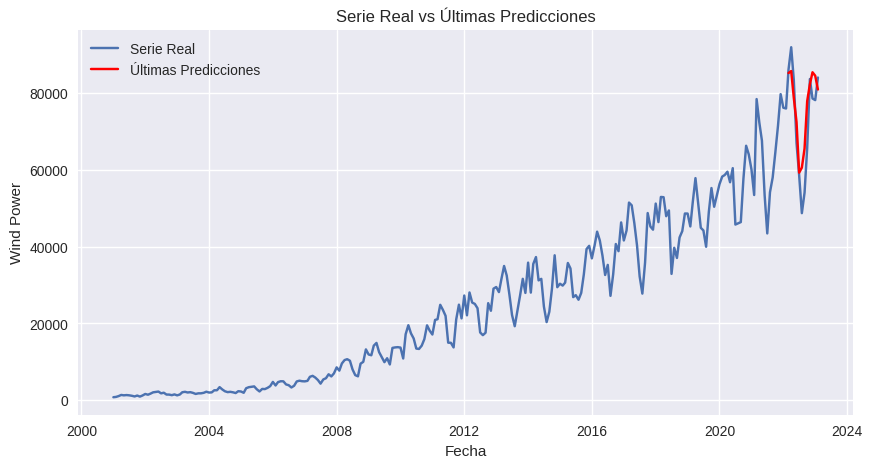

In [46]:
plt.plot(serie['wind_power'].index, serie['wind_power'].values, label='Serie Real')
plt.plot(arima_pred.index, arima_pred.values, label='Últimas Predicciones', linestyle='-',color='red')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Real vs Últimas Predicciones')
plt.legend()
plt.show()

In [47]:
def evaluacion_metrica(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [48]:
evaluacion_metrica(test_data['wind_power'],arima_pred)

Evaluation metric results:-
MSE is : 50935147.16379886
MAE is : 5918.247425450657
RMSE is : 7136.886377391675
MAPE is : 9.076755765637847
R2 is : 0.7185717157429481



In [49]:
test_data['Model1_Predictions'] = arima_pred
test_data

<ipython-input-49-d1c3621ab78f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Model1_Predictions'] = arima_pred


,wind_power,wind_power_log,Model1_Predictions
date,,,
2022-03-01,86021.0,11.362347,85190.430549
2022-04-01,91914.0,11.428609,85708.900498
2022-05-01,83333.0,11.330600,78699.857053
2022-06-01,66959.0,11.111836,72442.135196
2022-07-01,58600.0,10.978490,59247.562195
2022-08-01,48706.0,10.793558,60558.054733
2022-09-01,54063.0,10.897905,65542.360438
2022-10-01,65644.0,11.092001,77860.400169
2022-11-01,83643.0,11.334313,82266.089984


## ***LSTM Forecast***

In [50]:
data_train=train_data.copy()
data_train=data_train.drop('wind_power_log',axis=1)
data_train

,wind_power
date,
2001-01-01,777.0
2001-02-01,862.0
2001-03-01,1064.0
2001-04-01,1369.0
2001-05-01,1270.0
...,...
2021-10-01,64427.0
2021-11-01,71502.0
2021-12-01,79700.0


In [ ]:
data_test=test.copy()
data_test=data_test.drop('wind_power_log',axis=1)
data_test

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)
scaled_train_data = scaler.transform(data_train)
scaled_test_data = scaler.transform(data_test)

In [53]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
lstm_model.fit_generator(generator,epochs=50)

<ipython-input-55-5614094276d4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  lstm_model.fit_generator(generator,epochs=50)


Epoch 1/50
242/242 [==============================] - 10s 29ms/step - loss: 0.1918
Epoch 2/50
242/242 [==============================] - 6s 23ms/step - loss: 0.0672
Epoch 3/50
242/242 [==============================] - 3s 13ms/step - loss: 0.0614
Epoch 4/50
242/242 [==============================] - 3s 14ms/step - loss: 0.0656
Epoch 5/50
242/242 [==============================] - 3s 13ms/step - loss: 0.0591
Epoch 6/50
242/242 [==============================] - 3s 13ms/step - loss: 0.0632
Epoch 7/50
242/242 [==============================] - 4s 16ms/step - loss: 0.0657
Epoch 8/50
242/242 [==============================] - 3s 13ms/step - loss: 0.0568
Epoch 9/50
242/242 [==============================] - 3s 13ms/step - loss: 0.0508
Epoch 10/50
242/242 [==============================] - 4s 16ms/step - loss: 0.0491
Epoch 11/50
242/242 [==============================] - 3s 13ms/step - loss: 0.0466
Epoch 12/50
242/242 [==============================] - 4s 15ms/step - loss: 0.0609
Epoch 13/50


In [56]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 88ms/step


In [57]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[ 60422.36847493],
       [ 73599.96629347],
       [ 81980.855094  ],
       [ 82456.05793098],
       [ 66747.90627242],
       [ 50625.12663092],
       [ 68591.17381076],
       [ 80594.1680044 ],
       [ 76440.32388995],
       [ 65504.26703626],
       [ 81265.78058379],
       [106289.12414176]])

In [58]:
test_data['Model2_Predictions'] = lstm_predictions
test_data

<ipython-input-58-b7a64f5f37ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Model2_Predictions'] = lstm_predictions


,wind_power,wind_power_log,Model1_Predictions,Model2_Predictions
date,,,,
2022-03-01,86021.0,11.362347,85190.430549,60422.368475
2022-04-01,91914.0,11.428609,85708.900498,73599.966293
2022-05-01,83333.0,11.330600,78699.857053,81980.855094
2022-06-01,66959.0,11.111836,72442.135196,82456.057931
2022-07-01,58600.0,10.978490,59247.562195,66747.906272
2022-08-01,48706.0,10.793558,60558.054733,50625.126631
2022-09-01,54063.0,10.897905,65542.360438,68591.173811
2022-10-01,65644.0,11.092001,77860.400169,80594.168004
2022-11-01,83643.0,11.334313,82266.089984,76440.323890


In [59]:
evaluacion_metrica(test_data['wind_power'],test_data["Model2_Predictions"])

Evaluation metric results:-
MSE is : 205434068.35236287
MAE is : 12162.879715536159
RMSE is : 14332.97137206249
MAPE is : 16.4724145373239
R2 is : -0.13506999790200358



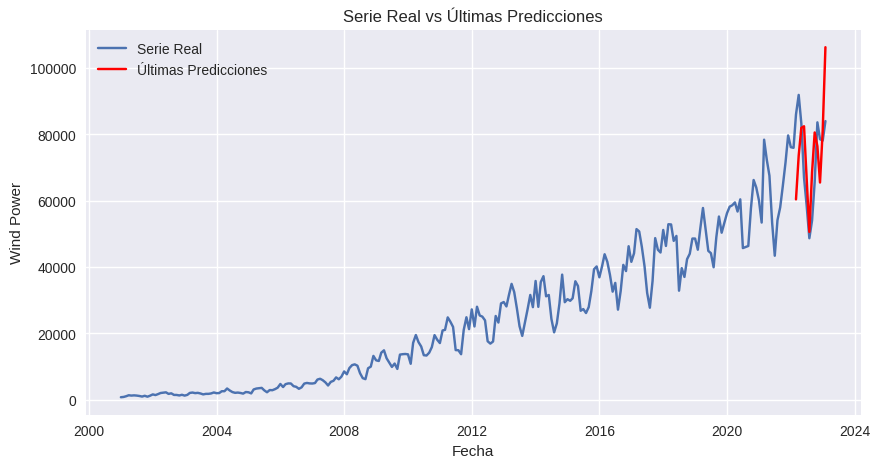

In [60]:
plt.plot(serie['wind_power'].index, serie['wind_power'].values, label='Serie Real')
plt.plot(test_data["Model2_Predictions"].index, test_data["Model2_Predictions"].values, label='Últimas Predicciones', linestyle='-',color='red')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Real vs Últimas Predicciones')
plt.legend()
plt.show()

<ipython-input-61-a3df801c4b9e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


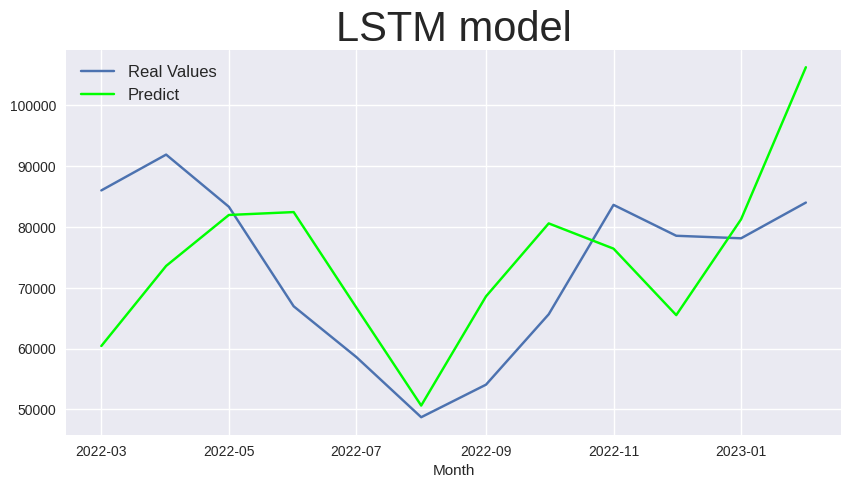

In [61]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(test_data["wind_power"], label="Real Values")
plt.plot(test_data["Model2_Predictions"], color="lime", label="Predict")
plt.title("LSTM model", fontsize=30);
plt.xlabel('Month')
plt.ylabel('')
plt.legend( fontsize=12);
plt.show();

## ***Prophet Forecast***

In [62]:
logYt=serie.copy()
logYt=logYt['wind_power_log']
logYt

date
2001-01-01     6.655440
2001-02-01     6.759255
2001-03-01     6.969791
2001-04-01     7.221836
2001-05-01     7.146772
                ...    
2022-10-01    11.092001
2022-11-01    11.334313
2022-12-01    11.271605
2023-01-01    11.266296
2023-02-01    11.338834
Freq: MS, Name: wind_power_log, Length: 266, dtype: float64

In [63]:
logYt=logYt.reset_index()

In [64]:
logYt_fb=logYt.rename(columns={"date":"ds", "wind_power_log":"y"} )
logYt_fb.head()

,ds,y
0,2001-01-01,6.655440
1,2001-02-01,6.759255
2,2001-03-01,6.969791
3,2001-04-01,7.221836
4,2001-05-01,7.146772


In [65]:
train_data_pr = logYt_fb.iloc[:len(logYt)-12]
test_data_pr = logYt_fb.iloc[len(logYt)-12:]

In [66]:
from prophet import Prophet
m = Prophet()
m.fit(train_data_pr)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfcxro6il/8ikqaez0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfcxro6il/2zzj3bbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92771', 'data', 'file=/tmp/tmpfcxro6il/8ikqaez0.json', 'init=/tmp/tmpfcxro6il/2zzj3bbs.json', 'output', 'file=/tmp/tmpfcxro6il/prophet_modeloelw6rr_/prophet_model-20240403204422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [68]:
prophet_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,6.986997,6.852989,7.143295,6.986997,6.986997,0.012217,0.012217,0.012217,0.012217,0.012217,0.012217,0.0,0.0,0.0,6.999215
1,2001-02-01,7.007868,6.766648,7.076422,7.007868,7.007868,-0.085597,-0.085597,-0.085597,-0.085597,-0.085597,-0.085597,0.0,0.0,0.0,6.922271
2,2001-03-01,7.026720,7.021547,7.324912,7.026720,7.026720,0.142730,0.142730,0.142730,0.142730,0.142730,0.142730,0.0,0.0,0.0,7.169450
3,2001-04-01,7.047591,7.067037,7.362007,7.047591,7.047591,0.168363,0.168363,0.168363,0.168363,0.168363,0.168363,0.0,0.0,0.0,7.215954
4,2001-05-01,7.067788,7.040341,7.335387,7.067788,7.067788,0.116728,0.116728,0.116728,0.116728,0.116728,0.116728,0.0,0.0,0.0,7.184517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2022-10-01,11.206545,11.012363,11.302902,11.201069,11.212529,-0.051804,-0.051804,-0.051804,-0.051804,-0.051804,-0.051804,0.0,0.0,0.0,11.154742
262,2022-11-01,11.215634,11.044432,11.345242,11.209034,11.223022,-0.023640,-0.023640,-0.023640,-0.023640,-0.023640,-0.023640,0.0,0.0,0.0,11.191994
263,2022-12-01,11.224429,11.075534,11.375579,11.215885,11.233207,-0.002621,-0.002621,-0.002621,-0.002621,-0.002621,-0.002621,0.0,0.0,0.0,11.221808
264,2023-01-01,11.233518,11.101326,11.393001,11.223625,11.243724,0.017688,0.017688,0.017688,0.017688,0.017688,0.017688,0.0,0.0,0.0,11.251206


In [69]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [70]:
prophet_pred = prophet_pred.set_index("Date")

In [71]:
prophet_pred.index.freq = "MS"

In [72]:
prophet_pred

,Pred
Date,
2022-03-01,11.266940
2022-04-01,11.340517
2022-05-01,11.269464
2022-06-01,11.180233
2022-07-01,10.996394
2022-08-01,10.953965
2022-09-01,10.989402
2022-10-01,11.154742
2022-11-01,11.191994


In [73]:
test_data["Model3_Predictions"] = np.exp(prophet_pred['Pred'].values)

<ipython-input-73-2d43ff733be7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Model3_Predictions"] = np.exp(prophet_pred['Pred'].values)


In [74]:
test_data

,wind_power,wind_power_log,Model1_Predictions,Model2_Predictions,Model3_Predictions
date,,,,,
2022-03-01,86021.0,11.362347,85190.430549,60422.368475,78193.392138
2022-04-01,91914.0,11.428609,85708.900498,73599.966293,84163.563578
2022-05-01,83333.0,11.330600,78699.857053,81980.855094,78390.957019
2022-06-01,66959.0,11.111836,72442.135196,82456.057931,71699.075880
2022-07-01,58600.0,10.978490,59247.562195,66747.906272,59658.606680
2022-08-01,48706.0,10.793558,60558.054733,50625.126631,57180.334197
2022-09-01,54063.0,10.897905,65542.360438,68591.173811,59242.959041
2022-10-01,65644.0,11.092001,77860.400169,80594.168004,69894.458377
2022-11-01,83643.0,11.334313,82266.089984,76440.323890,72547.260771


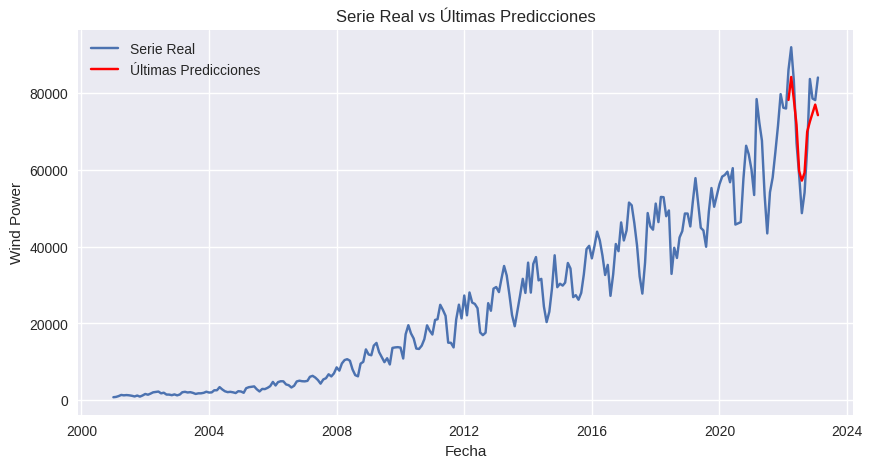

In [76]:
plt.plot(serie['wind_power'].index, serie['wind_power'].values, label='Serie Real')
plt.plot(test_data["Model3_Predictions"].index, test_data["Model3_Predictions"].values, label='Últimas Predicciones', linestyle='-',color='red')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Real vs Últimas Predicciones')
plt.legend()
plt.show()

<ipython-input-77-33eb4913cd5e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


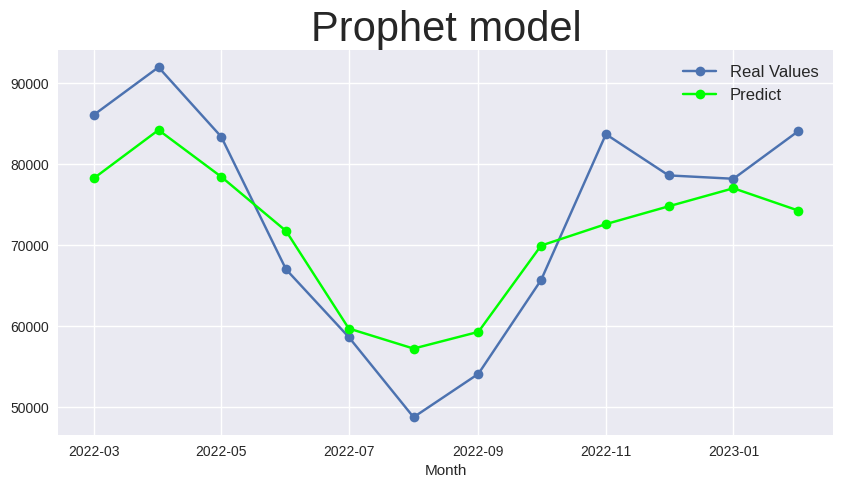

In [77]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot_date(test_data.index,test_data["wind_power"], label="Real Values",linestyle="-")
plt.plot_date(test_data.index,test_data["Model3_Predictions"], color="lime", label="Predict",linestyle="-")
plt.title("Prophet model", fontsize=30);
plt.xlabel('Month')
plt.ylabel('')
plt.legend( fontsize=12);
plt.show();

In [79]:
evaluacion_metrica(test_data['wind_power'],test_data["Model3_Predictions"])

Evaluation metric results:-
MSE is : 43430027.07189468
MAE is : 5842.172996078157
RMSE is : 6590.146210206165
MAPE is : 8.090686522333563
R2 is : 0.7600392129078309



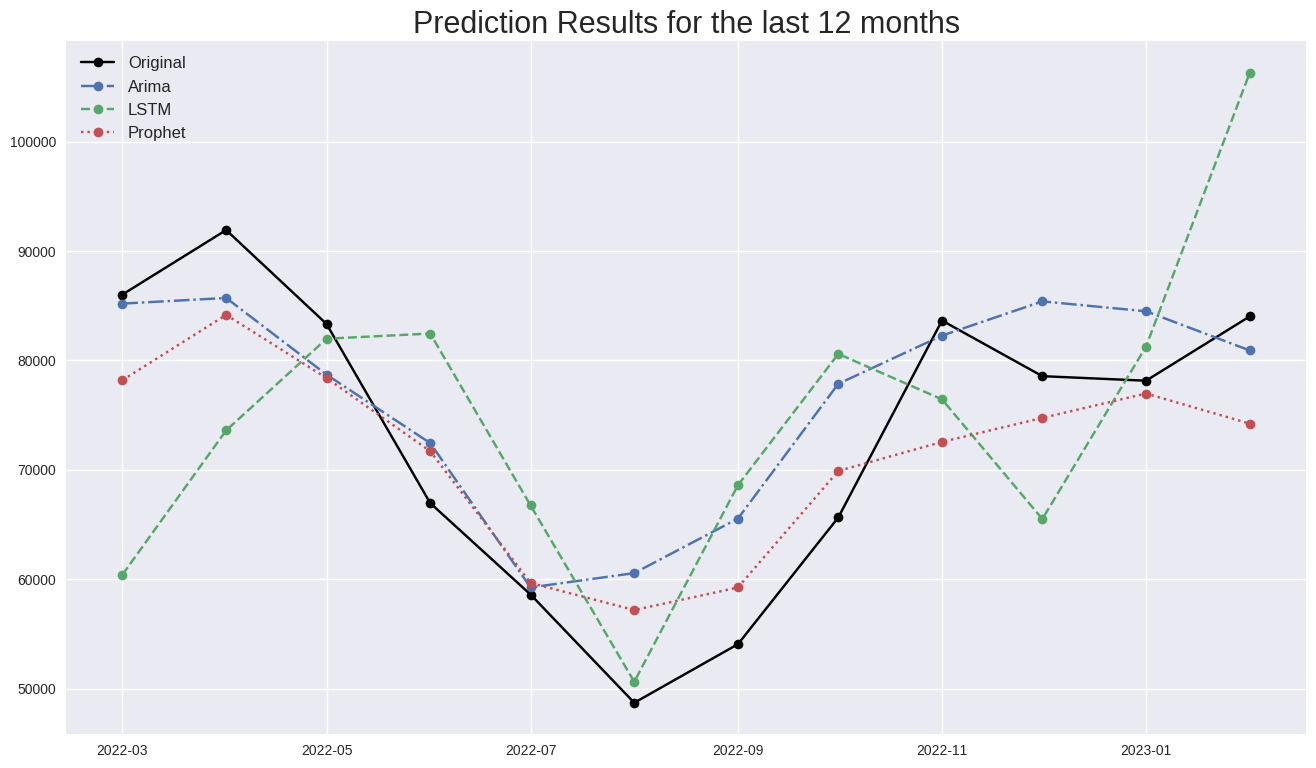

In [81]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data['wind_power'],label="Original", linestyle="-",color='black')
plt.plot_date(test_data.index, test_data["Model1_Predictions"], label="Arima",linestyle="-.")
plt.plot_date(test_data.index, test_data["Model2_Predictions"],label="LSTM", linestyle="--")
plt.plot_date(test_data.index, test_data["Model3_Predictions"], label="Prophet",linestyle=":")
plt.legend(fontsize=12)
plt.title("Prediction Results for the last 12 months", fontsize=22)
plt.show();